# EN3160 - Internsity Transformations and Neighborhood Filtering

## Question 01

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

In [ ]:
c = np.array([(50,50), (50,100), (150,255), (150,150), (255,255)])

t1 = np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')
print(len(transform))


256


Text(0, 0.5, 'Output, $\\mathrm{T}[f(\\mathbf{x})]$')

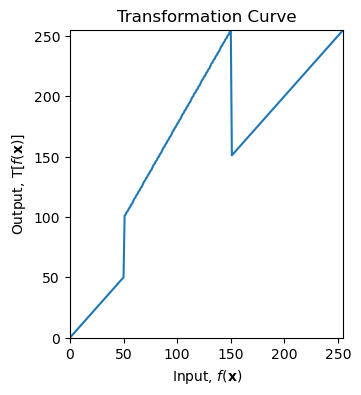

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(transform)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

(np.float64(-0.5), np.float64(719.5), np.float64(809.5), np.float64(-0.5))

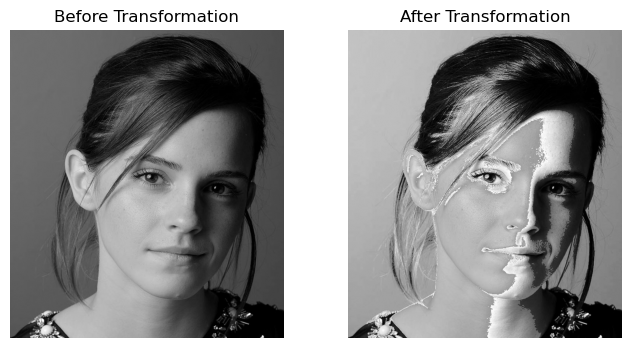

In [24]:
img_orig = cv.imread(IMG_PATH+"emma.jpg",cv.IMREAD_GRAYSCALE)
img_transformed = cv.LUT(img_orig,transform)

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(img_orig,cmap="gray")
plt.title("Before Transformation")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_transformed,cmap="gray")
plt.title("After Transformation")
plt.axis('off')

## Question 2

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

(np.float64(-0.5), np.float64(180.5), np.float64(216.5), np.float64(-0.5))

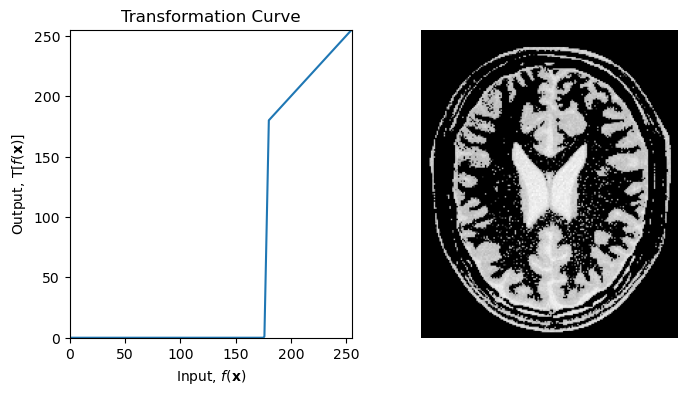

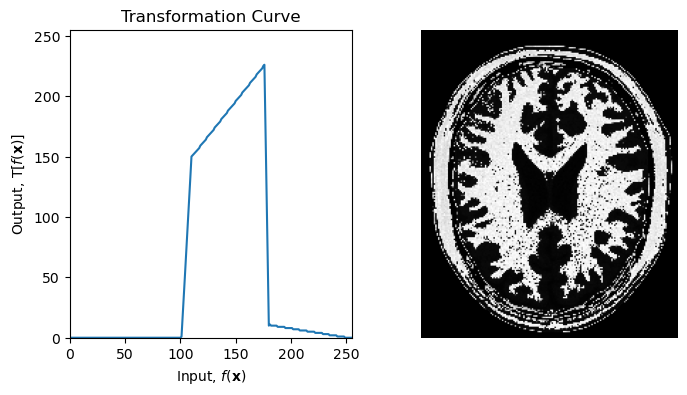

In [41]:
img_brain = cv.imread(IMG_PATH+"brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)

#####################  Tranformation for White matter  ##########################

c= np.array([(0,0), (175,0), (180,180), (255,255)]) #white matter range : 175-255

t1=np.linspace(c[0,1],c[1,1],c[1,0]+1-c[0,0]).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')

transform_white = np.concatenate((t1,t2,t3),axis=0).astype('uint8')

img_whitematter = cv.LUT(img_brain,transform_white)

#####################  Tranformation for Gray matter  ##########################

c= np.array([(0,0), (100,0), (110,150), (175,225), (180,10), (255,0)]) #gray matter range : 100-175

t1=np.linspace(c[0,1],c[1,1],c[1,0]+1-c[0,0]).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
t4=np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')
t5=np.linspace(c[4,1]+1,c[5,1],c[5,0]-c[4,0]).astype('uint8')

transform_gray = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')

img_graymatter = cv.LUT(img_brain,transform_gray)


plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(transform_white)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

plt.subplot(122)
plt.imshow(img_whitematter,cmap='gray')
plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(transform_gray)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

plt.subplot(122)
plt.imshow(img_graymatter,cmap='gray')
plt.axis('off')


## Question 3

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

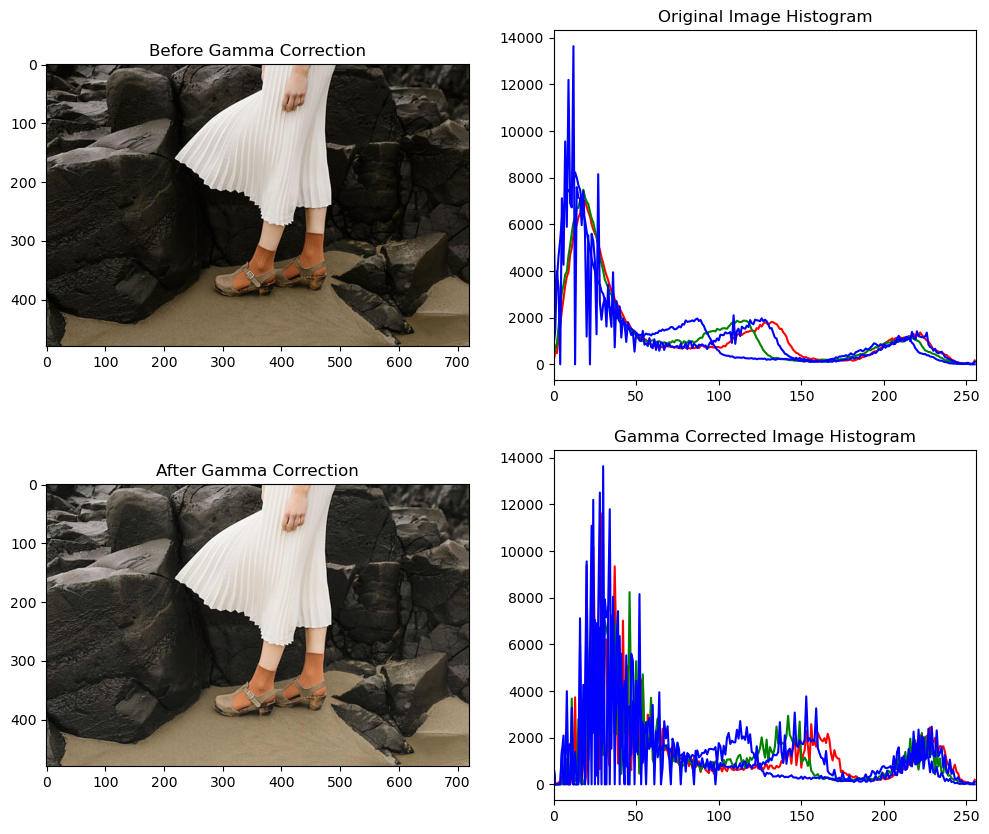

In [19]:
# For the gamma correction we need to work on the luminance channel. 
# We need to read the image on LAB color space

img = cv.imread(IMG_PATH+"highlights_and_shadows.jpg")
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
gamma = 0.7

t=np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')

L_channel,*_ = cv.split(img_lab)

L_gamma= cv.LUT(L_channel,t)

img_gamma = cv.merge((L_gamma,*_))

img_corrected = cv.cvtColor(img_gamma,cv.COLOR_Lab2RGB)

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.imshow(img_rgb)
plt.title("Before Gamma Correction")
plt.subplot(223)
plt.imshow(img_corrected)
plt.title("After Gamma Correction")


plt.subplot(222)
plt.title("Original Image Histogram")
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    # Calculate histogram for each channel (R, G, B)
    hist = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

hist_l = cv.calcHist([L_channel], [0], None, [256], [0, 256])
plt.plot(hist_l, color=color)


plt.subplot(224)
plt.title("Gamma Corrected Image Histogram")
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    # Calculate histogram for each channel (R, G, B)
    hist = cv.calcHist([img_corrected], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

hist_l = cv.calcHist([L_gamma], [0], None, [256], [0, 256])
plt.plot(hist_l, color=color)


## Question 04

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

In [14]:
from ipywidgets import interact, FloatSlider

img = cv.imread(IMG_PATH+"spider.png")

a = 0.5
sigma = 70



def update_saturation(a):
    
    img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    h,s,v = cv.split(img_hsv)

    x = np.arange(0, 256, dtype=np.float64)

    # Calculate the transformation based on the current 'a' from the slider
    transformation = x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2))
    
    # Create the Look-Up Table (LUT)
    lut = np.clip(transformation, 0, 255).astype('uint8')
    
    # Apply the LUT to the saturation channel
    s_transformed = cv.LUT(s, lut) 
    
    # Merge the channels back and convert to RGB
    img_transformed_hsv = cv.merge([h, s_transformed, v])
    img_transformed_rgb = cv.cvtColor(img_transformed_hsv, cv.COLOR_HSV2RGB)
    
    # --- 3. Display the images ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(img_transformed_rgb)
    axes[1].set_title(f'Transformed Image (a = {a:.2f})')
    axes[1].axis('off')

    # Intensity Transformation Plot

    plt.figure(figsize=(8,6))
    plt.plot(x, lut, color='crimson', linewidth=2, label='Transformation Curve')
    plt.plot(x, x, linestyle='--', color='gray', label='Original (y=x)') # Reference line
    plt.title('Intensity Transformation (LUT)')
    plt.xlabel('Input Saturation')
    plt.ylabel('Output Saturation')
    plt.xlim([0, 255])
    plt.ylim([0, 260])
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend()


    plt.show()
    

interact(
        update_saturation, 
        a=FloatSlider(
            min=0.0, 
            max=1.0, 
            step=0.05, 
            value=0.5, 
            description='Strength (a):',
            style={'description_width': 'initial'} # Ensures the description is not cut off
        )
    )

interactive(children=(FloatSlider(value=0.5, description='Strength (a):', max=1.0, step=0.05, style=SliderStyl…

<function __main__.update_saturation(a)>

## Question 05